IMPORTING THE LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

LOADING THE DATASET

In [2]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


APPLYTING EDA

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [6]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.shape

(891, 15)

In [8]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [9]:
df.size

13365

In [10]:
df_original = df.copy()

CHECKING MISSING VALUES IF CONTAINS HANDLING IT

In [11]:
df.isna().sum().sort_values(ascending = False)

deck           688
age            177
embark_town      2
embarked         2
alone            0
alive            0
adult_male       0
who              0
class            0
fare             0
parch            0
sibsp            0
sex              0
pclass           0
survived         0
dtype: int64

In [12]:
df_original['deck'] = df_original['deck'].astype(str)
df_original['deck'] = df_original['deck'].replace('nan','U')
df_original.dropna(subset = ['age', 'embark_town', 'embarked'], inplace = True)

In [13]:
df_original.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [14]:
df_original.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,U,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,U,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,U,Southampton,no,True


CHANGING THE COLUMN NAMES FOR BETTER UNDERSTANDING

In [15]:
d = {
    'sibsp' : 'siblings/spouse',
    'who' : 'gender',
    'adult_male' : 'is_male',
    'parch' : 'parents/child'
}
df_original.rename(columns = d, inplace = True)

In [16]:
df_original.head(5)

,survived,pclass,sex,age,siblings/spouse,parents/child,fare,embarked,class,gender,is_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,U,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,U,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,U,Southampton,no,True


FILTEIRNG THE DATA

NO OF MALES AND FEMALES

In [17]:
df_original['sex'].value_counts()

male      453
female    259
Name: sex, dtype: int64

WHO'S SURVIVAL RATE IS MORE FEMALE OR MALE BASED ON CLASS

In [18]:
pd.pivot_table(df_original,
               values = 'survived',
               index = 'sex',
               columns = 'pclass',
               
)

pclass,1,2,3
sex,,,
female,0.963855,0.918919,0.460784
male,0.396040,0.151515,0.150198


WHICH AGE GORUP PEOPLE SURVIVED MORE

In [19]:
df_original['age'].unique()

array([22.  , 38.  , 26.  , 35.  , 54.  ,  2.  , 27.  , 14.  ,  4.  ,
       58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,  8.  ,
       19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
       29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [20]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
age_group = pd.cut(df_original['age'], bins=bins, labels=labels)
df_original.insert(4, 'age_grp', age_group)

In [21]:
df_original.head()

,survived,pclass,sex,age,age_grp,siblings/spouse,parents/child,fare,embarked,class,gender,is_male,deck,embark_town,alive,alone
0,0,3,male,22.0,20-30,1,0,7.2500,S,Third,man,True,U,Southampton,no,False
1,1,1,female,38.0,30-40,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,20-30,0,0,7.9250,S,Third,woman,False,U,Southampton,yes,True
3,1,1,female,35.0,30-40,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,30-40,0,0,8.0500,S,Third,man,True,U,Southampton,no,True


In [22]:
cols = ['age_grp']
age_grp = df_original.groupby(cols, as_index = False)['survived'].count().sort_values(by = 'survived', ascending = False)
age_survival = age_grp
age_survival

,age_grp,survived
2,20-30,230
3,30-40,154
1,10-20,115
4,40-50,86
0,0-10,64
5,50-60,42
6,60-70,16
7,70-80,5


DATA VISUALIZATION

Text(0, 0.5, 'Survival rate')

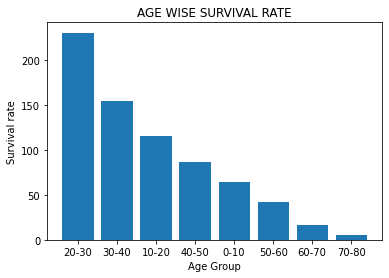

In [23]:
plt.bar(age_survival.age_grp, age_survival.survived)
plt.title("AGE WISE SURVIVAL RATE")
plt.xlabel("Age Group")
plt.ylabel("Survival rate")

CONVERTING FEATURES FROM ONE DATA TYPE TO ANOTHER

In [24]:
df_original['age'] = df_original['age'].astype(int)

In [25]:
df_original.head()

,survived,pclass,sex,age,age_grp,siblings/spouse,parents/child,fare,embarked,class,gender,is_male,deck,embark_town,alive,alone
0,0,3,male,22,20-30,1,0,7.2500,S,Third,man,True,U,Southampton,no,False
1,1,1,female,38,30-40,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26,20-30,0,0,7.9250,S,Third,woman,False,U,Southampton,yes,True
3,1,1,female,35,30-40,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35,30-40,0,0,8.0500,S,Third,man,True,U,Southampton,no,True


In [26]:
df_original.dtypes

survived              int64
pclass                int64
sex                  object
age                   int32
age_grp            category
siblings/spouse       int64
parents/child         int64
fare                float64
embarked             object
class              category
gender               object
is_male                bool
deck                 object
embark_town          object
alive                object
alone                  bool
dtype: object

TOTAL NUMBER OF PEOPLE WHO ARE TRAVELLED WITH THEIR FAMILIES

In [27]:
df_original.head(2)

,survived,pclass,sex,age,age_grp,siblings/spouse,parents/child,fare,embarked,class,gender,is_male,deck,embark_town,alive,alone
0,0,3,male,22,20-30,1,0,7.2500,S,Third,man,True,U,Southampton,no,False
1,1,1,female,38,30-40,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [28]:
travlled_alone = (df_original['alone'] == False).value_counts()
i = {
    False :  'With_Family',
    True  : 'Without_Family'
}
travel_count = pd.DataFrame(travlled_alone.rename(index = i))
travel_count.columns = ['count']                   
travel_count
travel_count

,count
With_Family,402
Without_Family,310


Text(0.5, 1.0, 'Travled Alone VS with Family')

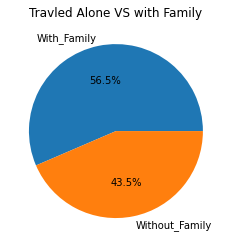

In [29]:
plt.pie(
    travel_count['count'],
    labels = travel_count.index,
    autopct = '%1.1f%%',
)
plt.xticks(rotation = 50)
plt.title("Travled Alone VS with Family")


FARE SPEND BY GENDER WISE

In [30]:
df_original.head(2)

,survived,pclass,sex,age,age_grp,siblings/spouse,parents/child,fare,embarked,class,gender,is_male,deck,embark_town,alive,alone
0,0,3,male,22,20-30,1,0,7.2500,S,Third,man,True,U,Southampton,no,False
1,1,1,female,38,30-40,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [31]:
fare = pd.pivot_table(df_original,
               values = 'fare',
               index = 'sex',
               aggfunc = 'mean'
                
)
fare

,fare
sex,
female,47.332433
male,27.268836


Text(0.5, 1.0, 'Mean Fare spend by gender')

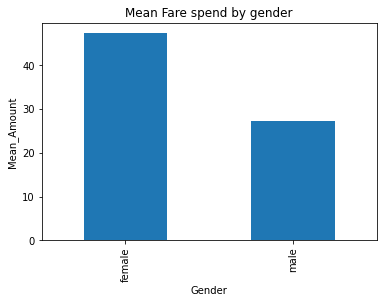

In [32]:
fare.plot(kind = 'bar', legend = False)
plt.xlabel("Gender")
plt.ylabel("Mean_Amount")
plt.title("Mean Fare spend by gender")

APPLYING MACHINE LEARNING FOR PREDICITON

SURVIVED OR NOT - PREDICITON BASED ON THE PCLASS AND IS_MALE AND FARE

In [33]:
df_original.head()

,survived,pclass,sex,age,age_grp,siblings/spouse,parents/child,fare,embarked,class,gender,is_male,deck,embark_town,alive,alone
0,0,3,male,22,20-30,1,0,7.2500,S,Third,man,True,U,Southampton,no,False
1,1,1,female,38,30-40,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26,20-30,0,0,7.9250,S,Third,woman,False,U,Southampton,yes,True
3,1,1,female,35,30-40,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35,30-40,0,0,8.0500,S,Third,man,True,U,Southampton,no,True


In [34]:
df_original.corr()['survived']

survived           1.000000
pclass            -0.356462
age               -0.082377
siblings/spouse   -0.015523
parents/child      0.095265
fare               0.266100
is_male           -0.551151
alone             -0.199741
Name: survived, dtype: float64

In [35]:
new_df = df_original.copy()

In [36]:
print("STEP 1:- IMPORTING THE LIBRARIES")
from sklearn.preprocessing import LabelEncoder

print("STEP 2:- LOADING THE DATASET")
new_df.head()

STEP 1:- IMPORTING THE LIBRARIES
STEP 2:- LOADING THE DATASET


,survived,pclass,sex,age,age_grp,siblings/spouse,parents/child,fare,embarked,class,gender,is_male,deck,embark_town,alive,alone
0,0,3,male,22,20-30,1,0,7.2500,S,Third,man,True,U,Southampton,no,False
1,1,1,female,38,30-40,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26,20-30,0,0,7.9250,S,Third,woman,False,U,Southampton,yes,True
3,1,1,female,35,30-40,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35,30-40,0,0,8.0500,S,Third,man,True,U,Southampton,no,True


In [37]:
print("STEP 3:- DATA PREPARATION")
le = LabelEncoder()
new_df['sex_n'] = le.fit_transform(new_df['sex'])
new_df['embarked_n'] = le.fit_transform(new_df['embarked'])
print("Male means : 1")
print("Female means : 0")
X = new_df[['pclass', 'sex_n', 'age','siblings/spouse','parents/child','fare', 'embarked_n']].values
print("Input is :\n", X)
y = new_df['survived'].values
y

STEP 3:- DATA PREPARATION
Male means : 1
Female means : 0
Input is :
 [[ 3.      1.     22.     ...  0.      7.25    2.    ]
 [ 1.      0.     38.     ...  0.     71.2833  0.    ]
 [ 3.      0.     26.     ...  0.      7.925   2.    ]
 ...
 [ 1.      0.     19.     ...  0.     30.      2.    ]
 [ 1.      1.     26.     ...  0.     30.      0.    ]
 [ 3.      1.     32.     ...  0.      7.75    1.    ]]


array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,

DECIDING WHICH MODLE SHOULD WE USE BY USING : K FOLD CROSS VALIDATION

In [38]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [39]:
model1 = SVC(kernel = 'rbf', C = 30)
model2 = DecisionTreeClassifier()
model3 = LogisticRegression( max_iter = 1000)
model4 = RandomForestClassifier(n_estimators = 100)

score1 = cross_val_score(model1 , X, y, cv = 5)
score2 = cross_val_score(model2 , X, y, cv = 5)
score3 = cross_val_score(model3 , X, y, cv = 5)
score4 = cross_val_score(model4 , X, y, cv = 5)

s_s = np.average(score1)
d_s = np.average(score2)
l_s = np.average(score3)
r_s = np.average(score4)



In [40]:
d = {
    'SVC_score' : s_s,
    'DecisonTree_score' : d_s,
    'Logistic_score' : l_s,
    'Random_Forest_score' : r_s
}
i = [0]
model_scores = pd.DataFrame(d, index = i)
model_scores

,SVC_score,DecisonTree_score,Logistic_score,Random_Forest_score
0,0.729026,0.759894,0.789323,0.800591


In [41]:

print("Mean:", np.mean(s_s), "Std Dev:", np.std(s_s))
print("Mean:", np.mean(d_s), "Std Dev:", np.std(d_s))
print("Mean:", np.mean(l_s), "Std Dev:", np.std(l_s))

print("Mean:", np.mean(r_s), "Std Dev:", np.std(r_s))



Mean: 0.729025903673791 Std Dev: 0.0
Mean: 0.7598936274992611 Std Dev: 0.0
Mean: 0.7893233527036344 Std Dev: 0.0
Mean: 0.8005909583374372 Std Dev: 0.0


LOGISTIC REGRESSION AND RANDOM FOREST IS HOLDING HIGH SCORE FOR PREDICITON I CAN GOT FOR LG FOR EASY DEPLOTMENT

In [42]:
print("STEP 4:- SPLITTING THE DATA SET")
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

STEP 4:- SPLITTING THE DATA SET


In [43]:
print("STEP 5:- MODEL CREATION")
model = LogisticRegression()

STEP 5:- MODEL CREATION


In [44]:
print("STEP 6:- MODEL TRAINING")
model.fit(X_train, y_train)

STEP 6:- MODEL TRAINING


LogisticRegression()

In [45]:
print("SPCL STEP:- CHECKING SCORE")
model.score(X_test, y_test)

SPCL STEP:- CHECKING SCORE


0.8391608391608392

In [46]:
new_df.head(1)

,survived,pclass,sex,age,age_grp,siblings/spouse,parents/child,fare,embarked,class,gender,is_male,deck,embark_town,alive,alone,sex_n,embarked_n
0,0,3,male,22,20-30,1,0,7.25,S,Third,man,True,U,Southampton,no,False,1,2


In [47]:
print("STEP 7:- PREDICITON")
print(model.predict([[1,1,69,1,1,77.0,2]]))
y_pred = model.predict(X_test)


STEP 7:- PREDICITON
[0]


In [48]:
print("Actual values are :\n", y_test)
print("Prediciton values are :\n", y_pred)


Actual values are :
 [1 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 0 1
 1 0 0 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1
 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0]
Prediciton values are :
 [1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 1
 1 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1
 1 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1]


In [49]:
print("SPCL STEP :- Check Accuracy on Train vs Test")
train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)


SPCL STEP :- Check Accuracy on Train vs Test
Train Accuracy: 0.7908611599297012
Test Accuracy: 0.8391608391608392


SAVING THE MODEL USING JOBLIB

In [50]:
import joblib
joblib.dump(model, 'titanic_model.pkl')

['titanic_model.pkl']

In [51]:
loaded_model = joblib.load('titanic_model.pkl')
